In [113]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from plotnine import *
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer

1. Read in the dataset, and display some summaries of the data.

In [114]:
insur = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
insur.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


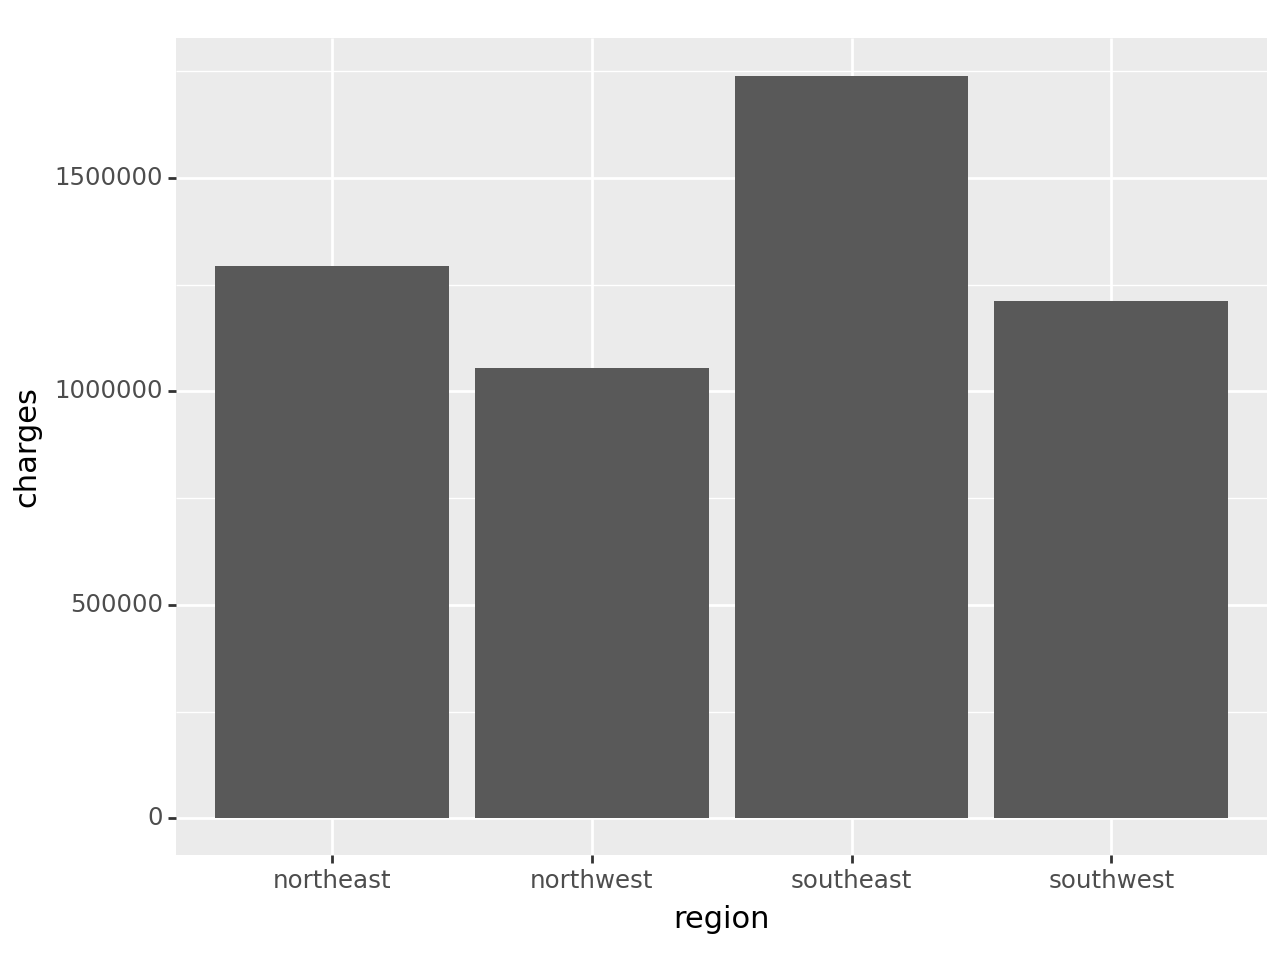

<Figure Size: (640 x 480)>

In [115]:
(
    ggplot(insur, aes(x='region', y='charges'))  
    + geom_bar(stat='identity')
)


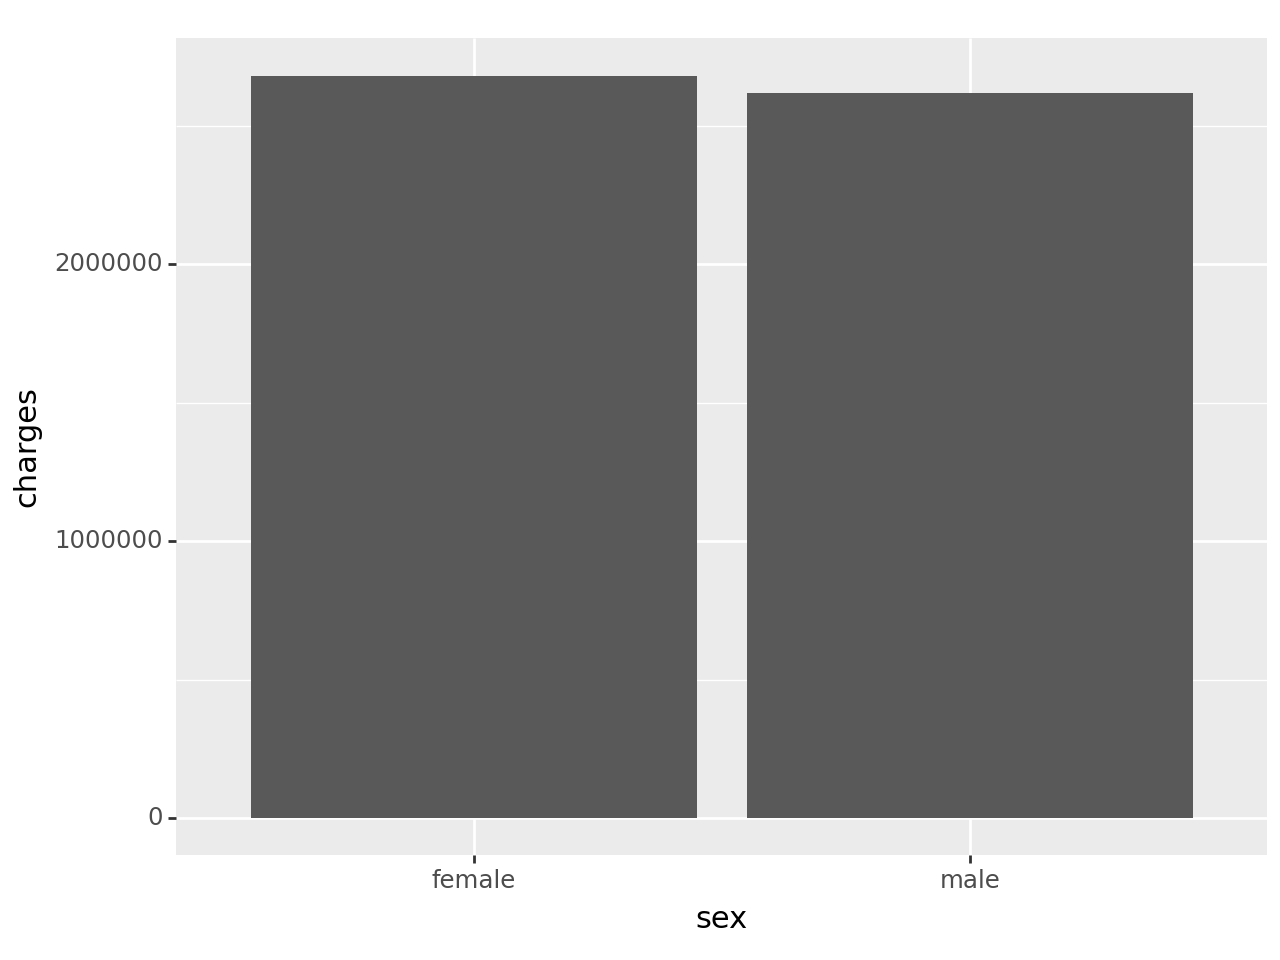

<Figure Size: (640 x 480)>

In [116]:
(
    ggplot(insur, aes(x='sex', y='charges'))  
    + geom_bar(stat='identity')
)


In [117]:
insur.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


2. Fix any concerns you have about the data.

In [118]:
insur_dum = pd.get_dummies(insur)
insur_dum.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,1,0,0,1,0,0,0,1
1,33,22.705,21984.47061,0,1,1,0,0,1,0,0
2,32,28.880,3866.85520,0,1,1,0,0,1,0,0
3,31,25.740,3756.62160,1,0,1,0,0,0,1,0
4,60,25.840,28923.13692,1,0,1,0,0,1,0,0


3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

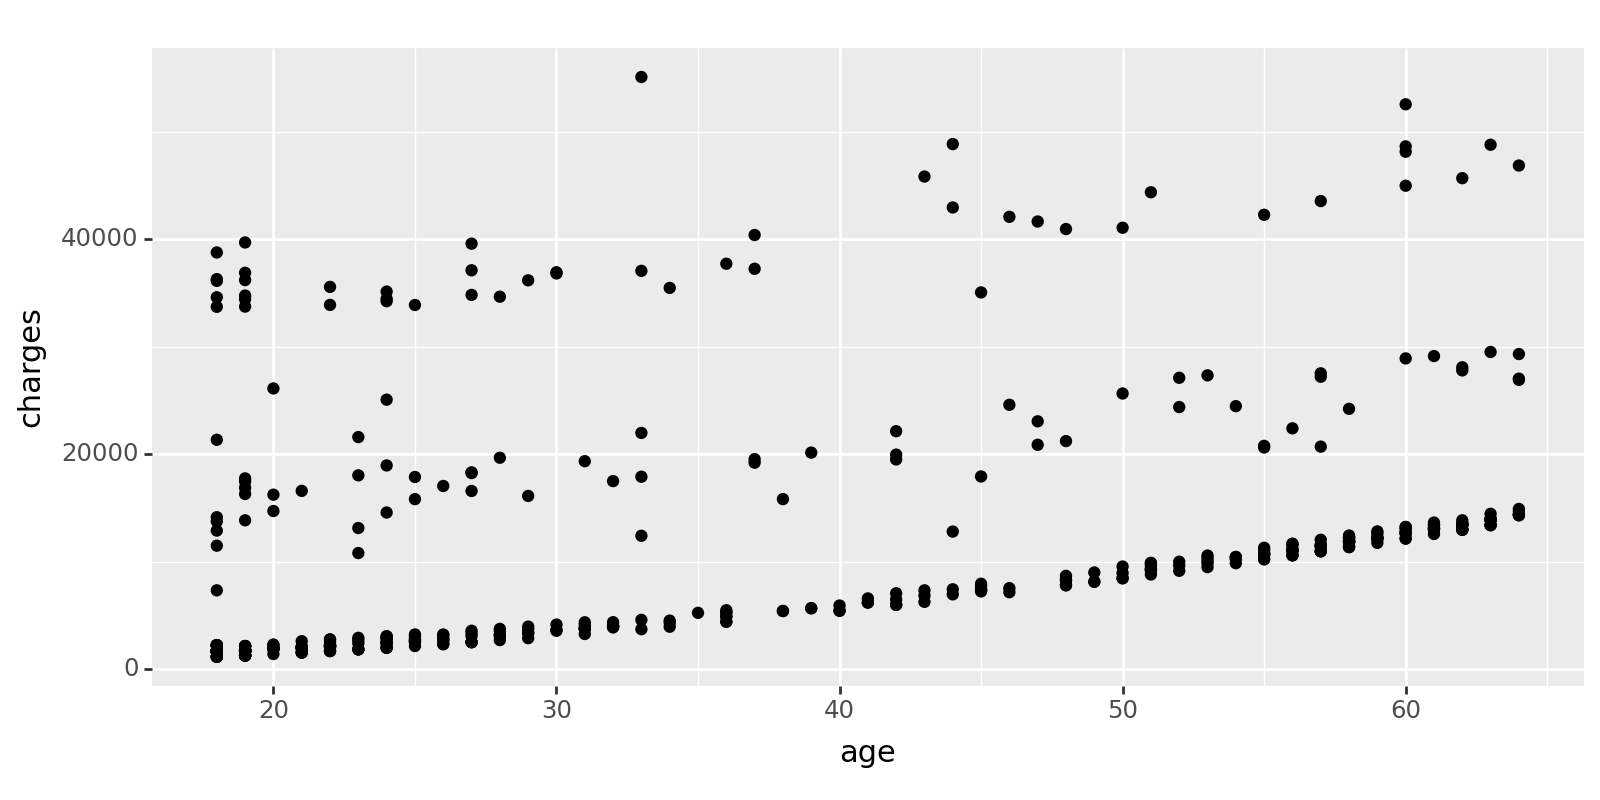

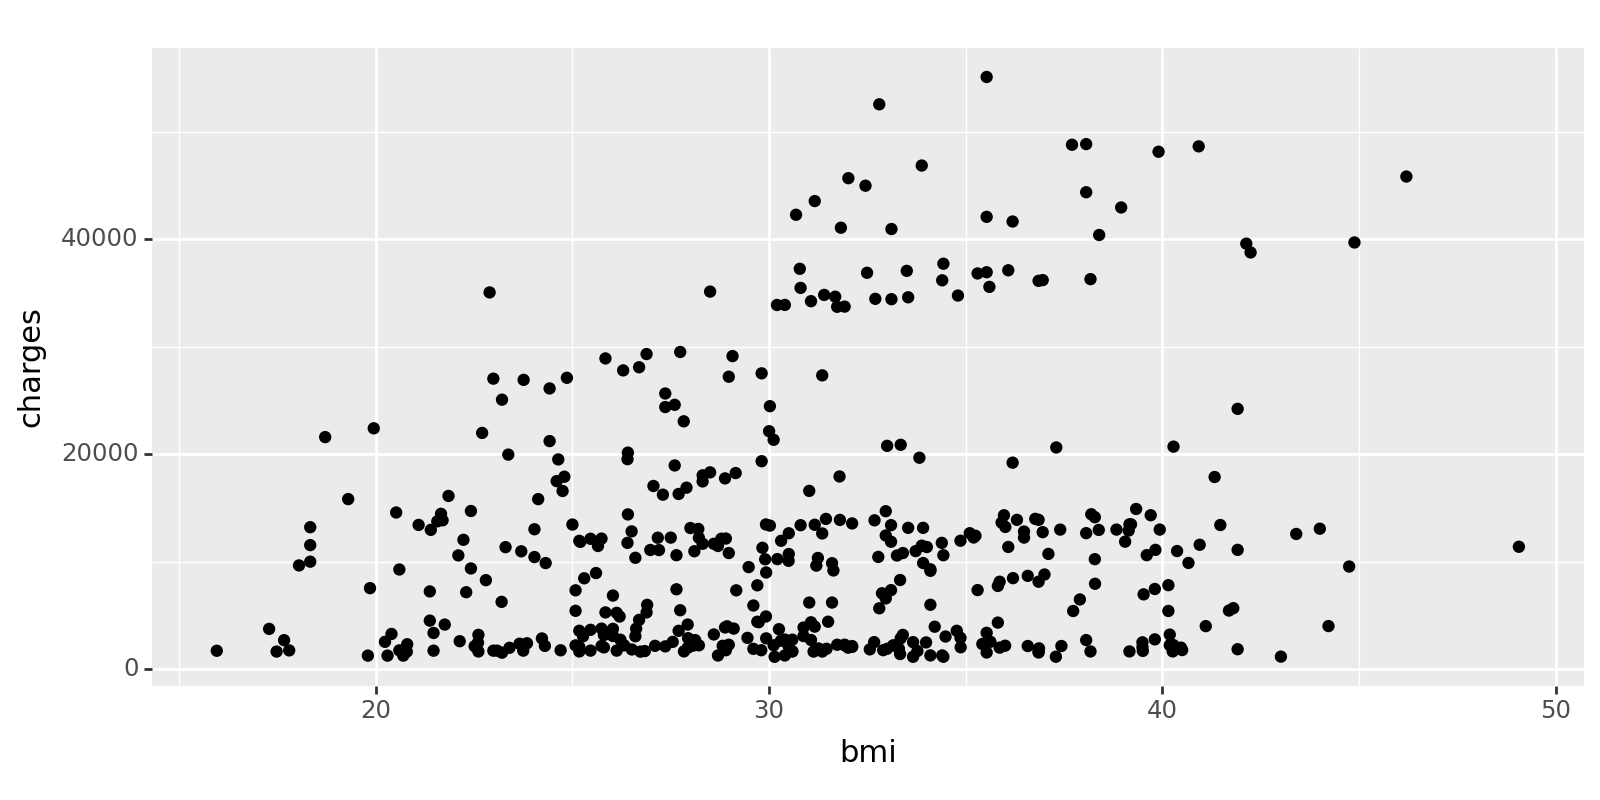

In [119]:
plot_predictors = ['age', 'bmi']
for i in plot_predictors:
    plot = (
    ggplot(insur)
    + aes(x=i, y = 'charges')
    + geom_point()

    + theme(figure_size=(8, 4))
    )
    print(plot)

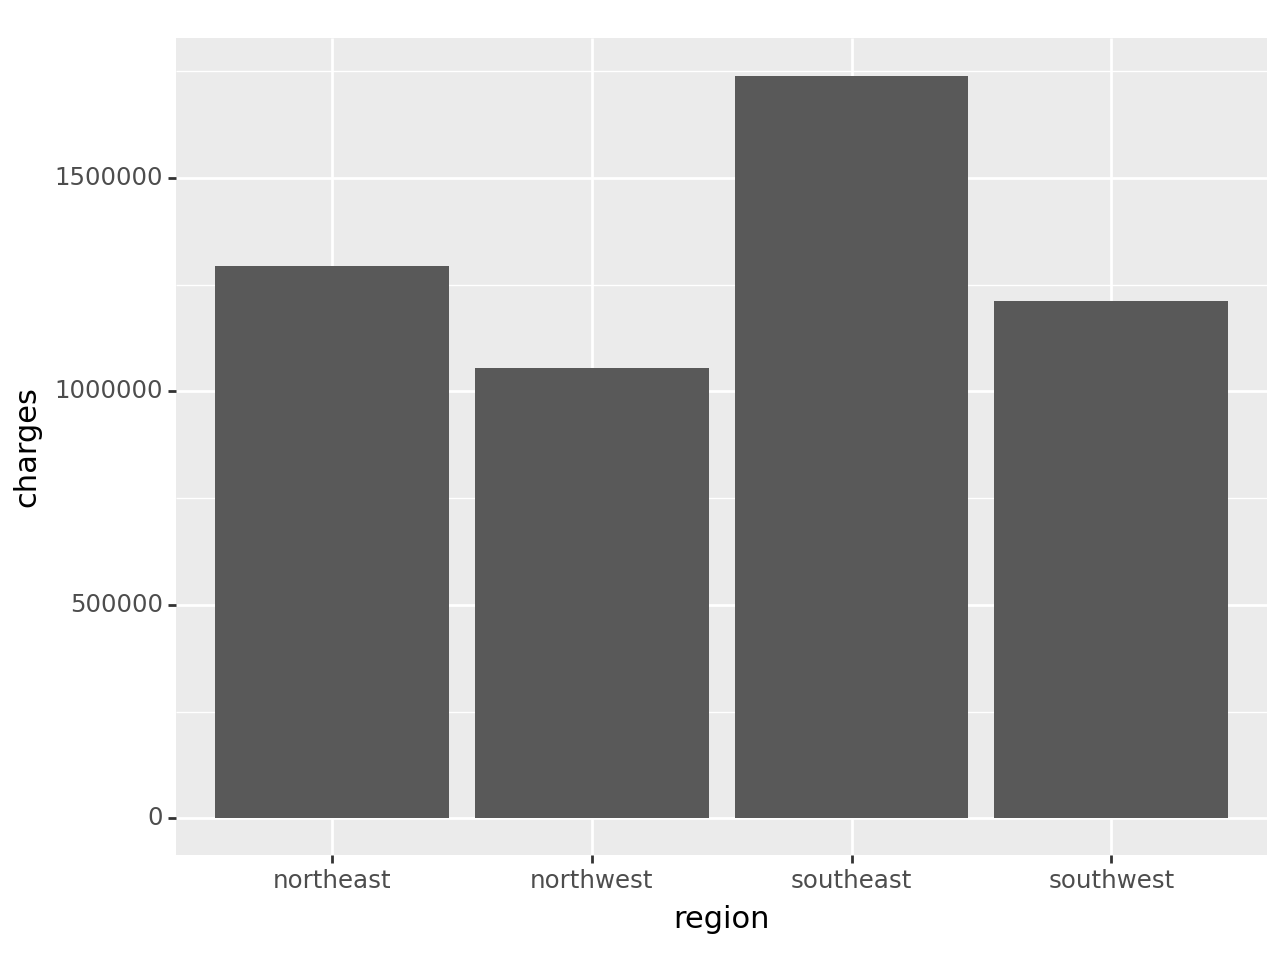

<Figure Size: (640 x 480)>

In [120]:
(
    ggplot(insur, aes(x='region', y='charges')) 
    + geom_bar(stat='identity')
)


PART 2: Simple Linear Models

1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [121]:
y = insur["charges"]
X_1 = insur[["age"]]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y, test_size =0.25)

In [122]:
lr = LinearRegression()
Model1 = lr.fit(X_train_1, y_train_1)
y_test_preds1 = Model1.predict(X_test_1)
mse1 = mean_squared_error(y_test_1, y_test_preds1)
mse1

112253041.46224836

In [123]:
r2_score(y_test_1, y_test_preds1)

0.12552652997065428

In [124]:
Model1.coef_[0]

225.04741122639763

In [125]:
Model1.intercept_

3899.159776556364

The model does not have a very good fit as it has an MSE of over 100 million. The r squared score is also below 10 percent. The coefficient estimate tells as that for every one year increase in age, we would expect charge to increase by 230.65 dollars. If age stays constant, we expect the charges to be $3048.87

2. Make a model that also incorporates the variable sex. Report your results.

In [126]:
y = insur_dum["charges"]
X_2 = insur_dum[["age", "sex_male"]]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y, test_size =0.25)

In [127]:
Model2 = lr.fit(X_train_2, y_train_2)
y_test_preds2 = Model2.predict(X_test_2)
mse2 = mean_squared_error(y_test_2, y_test_preds2)
mse2

142899426.49601877

In [128]:
r2_score(y_test_2, y_test_preds2)

0.05225421918568396

In [129]:
Model2.coef_

array([244.17183611, 533.52650446])

My r_squared score is very low and my MSE is incredibly large. It seems as though model 1 fits slightly better than model 2.

3. Now make a model that does not include sex, but does include smoker. Report your results.

In [130]:
y = insur_dum["charges"]
X_3 = insur_dum[["age", "smoker_yes"]]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3,y, test_size =0.25)

In [131]:
Model3 = lr.fit(X_train_3, y_train_3)
y_test_preds3 = Model3.predict(X_test_3)
mse3 = mean_squared_error(y_test_3, y_test_preds3)
mse3

40921276.82035728

In [132]:
r2_score(y_test_3, y_test_preds3)

0.73802316839803

In [133]:
Model3.coef_

array([  243.73532915, 23208.94549157])

This model has a much higher R squared and a slightly lower MSE. MSE: 28421465.743019443, R_sq: 0.7646037374054687

Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

I think that model 3 (Q3) fits the data better because the MSE is lower for Model 3 and the R squared is higher.

Part 3: Multiple Linear Models

Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?



In [134]:
y = insur_dum["charges"]
X_4 = insur_dum[["age", "bmi"]]

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4,y, test_size =0.25)

In [135]:
Model4 = lr.fit(X_train_4, y_train_4)
y_test_preds4 = Model4.predict(X_test_4)
mse4 = mean_squared_error(y_test_4, y_test_preds3)
print(mse1, mse4)

112253041.46224836 179483242.57912982


In [136]:
r2_score(y_test_4, y_test_preds4)

0.06484758226044518

The MSE of model four is greater than the MSE of Model 1 but the R squared is higher in Model 4 than in Model 1.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1

In [137]:
insur_dum['age_sq'] = insur_dum['age']**2

In [138]:
y = insur_dum["charges"]
X_5 = insur_dum[["age", "age_sq"]]

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5,y, test_size =0.25)

In [139]:
Model5 = lr.fit(X_train_5, y_train_5)
y_test_preds5 = Model5.predict(X_test_5)
mse5 = mean_squared_error(y_test_5, y_test_preds5)
r2_5 = r2_score(y_test_5, y_test_preds5)
print(mse5, r2_5)

114457129.52954009 0.1571972342512763


The MSE is higher for Model 4 and the R squared is slightly lower than in P2 Q1.

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [140]:
from sklearn.preprocessing import PolynomialFeatures
ct = ColumnTransformer([('degree4', PolynomialFeatures((1,4)), ['age'])])
my_pipeline6 = Pipeline(
    [('degree4', ct), ('OLS', lr)]
)

In [141]:
y = insur["charges"]
X_6 = insur[["age"]]

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6,y, test_size =0.25)

In [142]:
Model6 = my_pipeline6.fit(X_train_6, y_train_6)
y_test_preds_6 = Model6.predict(X_test_6)
mse6 = mean_squared_error(y_test_6, y_test_preds_6)
r2_6 = r2_score(y_test_6, y_test_preds_6)
print(mse6, r2_6)

91736244.3907749 0.1569376847983679


The MSE for model6 is slightly higher than that of Model1 and" the R squared is lower.

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [143]:
from sklearn.preprocessing import PolynomialFeatures
ct = ColumnTransformer([('degree12', PolynomialFeatures((1,12)), ['age'])])
my_pipeline7 = Pipeline(
    [('degree12', ct), ('OLS', lr)]
)

In [144]:
Model7 = my_pipeline7.fit(X_train_6, y_train_6)
y_test_preds_7 = Model7.predict(X_test_6)
mse7 = mean_squared_error(y_test_6, y_test_preds_7)
r2_7 = r2_score(y_test_6, y_test_preds_7)
print(mse7, r2_7)

92068475.81883441 0.15388445541468543


The MSE is higher for Model 7 than for Model 1 and the R squared is lower for Model 7 than for P2 Q1.

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

In [145]:
X_test_3['y_test_3'] = y_test_3
X_test_3['Y_test_preds_3'] = y_test_preds3
X_test_3['residuals_3'] = y_test_3 - y_test_preds3
X_test_3.head()

,age,smoker_yes,y_test_3,Y_test_preds_3,residuals_3
304,49,0,8125.78450,9918.399846,-1792.615346
5,25,0,2721.32080,4068.751946,-1347.431146
15,60,1,48173.36100,35808.433958,12364.927042
37,18,0,21344.84670,2362.604642,18982.242058
184,53,0,27346.04207,10893.341163,16452.700907


Model 3 was the best model according to MSE and r_squared because it had the highest R_squared and the lowest MSE. This model could potentially be the best model but first we will have to look at different interactions between features before making our decision.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

In [146]:
X_test_6['y_test_7'] = y_test_6
X_test_6['Y_test_preds_7'] = y_test_preds_7
X_test_6.head()

,age,y_test_7,Y_test_preds_7
53,63,13405.39030,19303.440520
328,34,4500.33925,12771.239422
86,58,11837.16000,15494.482031
233,24,2352.96845,9386.789687
192,25,17878.90068,9663.931267


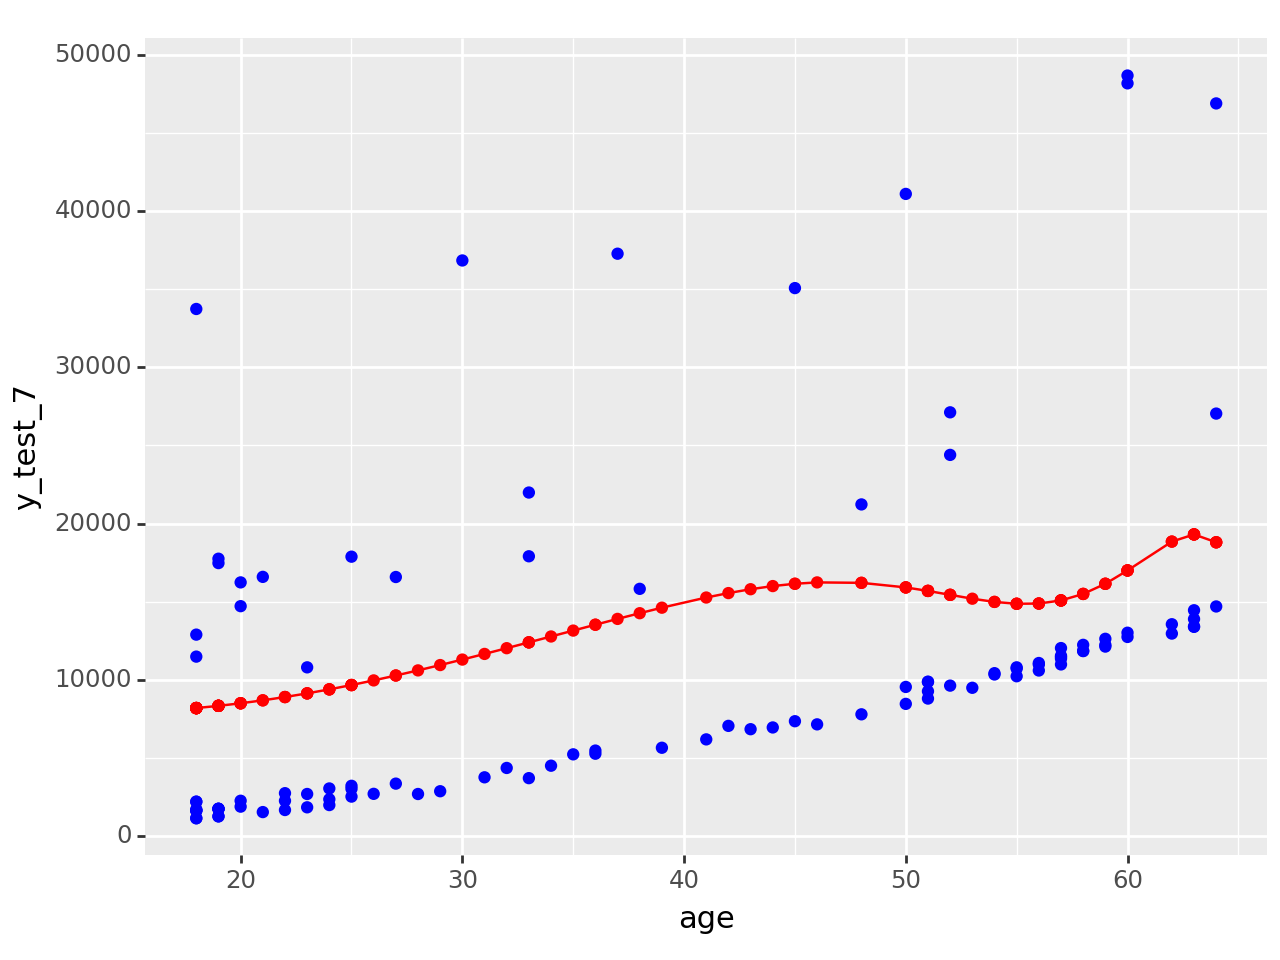

<Figure Size: (640 x 480)>

In [147]:
(
    ggplot(X_test_6)
    + aes(x='age')
    + geom_point(aes(y='y_test_7'), color='blue')
    + geom_point(aes(y='Y_test_preds_7'), color='red')
    + geom_line(aes(y='Y_test_preds_7'), color='red')
)

Part 4: New Data

In [148]:
new_data = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
nd_dum = pd.get_dummies(new_data)
nd_dum.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,23,34.400,1826.84300,0,1,1,0,0,0,0,1
1,56,40.300,10602.38500,0,1,1,0,0,0,0,1
2,18,34.100,1137.01100,0,1,1,0,0,0,1,0
3,63,23.085,14451.83515,1,0,1,0,1,0,0,0
4,63,28.310,13770.09790,0,1,1,0,0,1,0,0


Consider the following possible models:

Model 8: Only age as a predictor.

Model 9: age and bmi as a predictor.

Model 10: age, bmi, and smoker as predictors (no interaction terms)

Model 11: age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

Model 12: age, bmi, and smoker as predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)


For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

In [149]:
#Model 8: Only age as a predictor.
y = insur_dum["charges"]
X_8 = insur_dum[["age"]]
Model8= lr.fit(X_8, y)
new_p8 = Model8.predict(nd_dum[['age']])
mse8 = mean_squared_error(nd_dum['charges'], new_p8)
r2_8 = r2_score(nd_dum['charges'], new_p8)
print(mse8, r2_8)

136077136.50195494 0.12236515675533055


In [150]:
#Model 9: age and bmi as a predictor.
y = insur_dum["charges"]
X_9 = insur_dum[["age","bmi"]]
Model9 = lr.fit(X_9, y)
new_p9 = Model9.predict(nd_dum[['age', 'bmi']])
mse9 = mean_squared_error(nd_dum['charges'], new_p9)
r2_9 = r2_score(nd_dum['charges'], new_p9)
print(mse9, r2_9)

132636406.1108129 0.14455628272331222


In [151]:
#Model 10: age, bmi, and smoker as predictors (no interaction terms)
y = insur_dum["charges"]
X_10 = insur_dum[["age","bmi", "smoker_yes"]]
Model10 = lr.fit(X_10, y)
new_p10 = Model10.predict(nd_dum[['age', 'bmi', "smoker_yes"]])
mse10 = mean_squared_error(nd_dum['charges'], new_p10)
r2_10 = r2_score(nd_dum['charges'], new_p10)
print(mse10, r2_10)

35377541.24141632 0.7718311565047801


In [152]:
insur_dum["age_smoke"] = insur_dum['age']*insur_dum['smoker_yes']
insur_dum["bmi_smoke"] = insur_dum['bmi']*insur_dum['smoker_yes']
nd_dum['age_smoke'] = nd_dum['age']*nd_dum['smoker_yes']
nd_dum['bmi_smoke'] = nd_dum['bmi']*nd_dum['smoker_yes']

In [153]:
#Model 11: age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)
y = insur_dum["charges"]
X_11 = insur_dum[["age_smoke", "bmi_smoke"]]
Model11 = lr.fit(X_11, y)
new_p11 = Model11.predict(nd_dum[["age_smoke", "bmi_smoke"]])
mse11 = mean_squared_error(nd_dum['charges'], new_p11)
r2_11 = r2_score(nd_dum['charges'], new_p11)
print(mse11, r2_11)

47626025.35814417 0.6928340765095315


In [154]:
#Model 12: age, bmi, and smoker as predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)
y = insur_dum["charges"]
X_12 = insur_dum[["age", "bmi", "smoker_yes", "age_smoke", "bmi_smoke"]]
Model12 = lr.fit(X_12, y)
new_p12 = Model12.predict(nd_dum[["age", "bmi", "smoker_yes", "age_smoke", "bmi_smoke"]])
mse12 = mean_squared_error(nd_dum['charges'], new_p12)
r2_12 = r2_score(nd_dum['charges'], new_p12)
print(mse12, r2_12)

21786256.86685259 0.8594886795699616


Based on these new model's MSE predicted on the new data, Model 12 is the best which includes age, bmi, smoker, and the interaction between age and smoker as well as bmi and smoker. I chose this model because it has the lowest MSE of the five new models.

In [155]:
m12_resid = nd_dum['charges'] - new_p12
m12_res_df = pd.DataFrame({'Residuals': m12_resid, 'Predicted': new_p12, "Actual": nd_dum['charges']})
m12_res_df.head()

,Residuals,Predicted,Actual
0,-1771.030351,3597.873351,1826.84300
1,-1547.051734,12149.436734,10602.38500
2,-1168.355140,2305.366140,1137.01100
3,587.432573,13864.402577,14451.83515
4,-122.316796,13892.414696,13770.09790


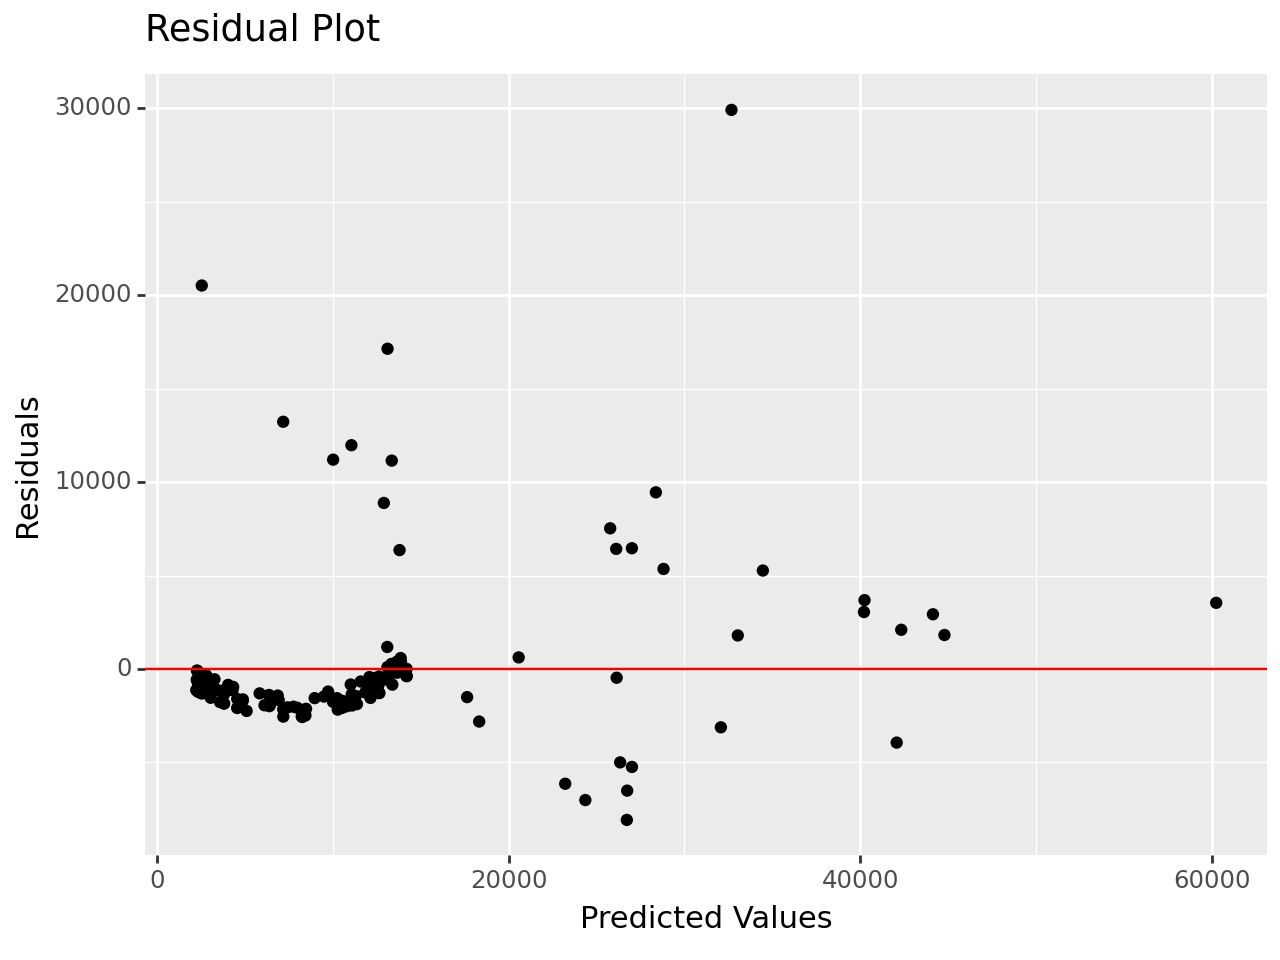

<Figure Size: (640 x 480)>

In [156]:
(ggplot(m12_res_df, aes(x='Predicted', y='Residuals')) +
 geom_point() +
 geom_hline(yintercept=0, color='red') +
 labs(x='Predicted Values', y='Residuals', title='Residual Plot'))

Part 5: Full Exploration

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [157]:
y = insur["charges"]
X_final = insur.drop('charges', axis = 1)

In [158]:
insur.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [159]:
ct_poly = ColumnTransformer(
  [
    ("polynomialage", PolynomialFeatures(), ["age"]),
      ("polynomialbmi", PolynomialFeatures(), ["bmi"])
  ],
  remainder = "drop"
)

lr_pipeline_poly = Pipeline(
  [("preprocessing", ct_poly),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

degrees = {'preprocessing__polynomialage__degree': np.arange(0, 10), 'preprocessing__polynomialbmi__degree': np.arange(0, 10)}


gscv = GridSearchCV(lr_pipeline_poly, degrees, cv = 5, scoring='r2')

In [223]:
gscv_fitted = gscv.fit(X_final, y)


In [161]:
gscv_fitted.cv_results_['mean_test_score']

array([-0.01038152,  0.02093879,  0.01903306,  0.01498947, -0.00549109,
       -0.0762934 , -0.21335072, -0.52379916, -0.65140143, -0.79375728,
        0.08852045,  0.10907309,  0.1070703 ,  0.09965344,  0.07623431,
        0.00491658, -0.09142551, -0.38525946, -0.55000036, -0.75861125,
        0.08454798,  0.10454392,  0.1028121 ,  0.09515258,  0.07272026,
        0.00221747, -0.0895821 , -0.38048099, -0.54558179, -0.7554074 ,
        0.07728159,  0.09846752,  0.09707288,  0.08931904,  0.06748759,
       -0.00378285, -0.09354805, -0.39459321, -0.56476359, -0.78298693,
        0.08023164,  0.10024375,  0.09907773,  0.09241173,  0.06873367,
        0.00801938, -0.05758797, -0.32468572, -0.48343146, -0.68355107,
        0.07534302,  0.09541278,  0.09394847,  0.08666012,  0.06311541,
        0.00476938, -0.05624154, -0.31940554, -0.47717857, -0.6822357 ,
        0.07154454,  0.09176392,  0.09047595,  0.08365255,  0.06019469,
        0.0016906 , -0.0599646 , -0.33117789, -0.49152711, -0.68

In [162]:
gscv.best_params_

{'preprocessing__polynomialage__degree': 1,
 'preprocessing__polynomialbmi__degree': 1}

Based on this analysis, we know that the best combination of polynomials is when both are at degree 1.

In [163]:
final_fit = lr_pipeline_poly.fit(X_final, y)
fpred = final_fit.predict(new_data.drop('charges', axis = 1))
mean_squared_error(fpred, new_data['charges'])

132734328.18809357

In [167]:
ct = ColumnTransformer([('degree1', FunctionTransformer(lambda x:x), ["age", 'bmi'])],  remainder = "drop")

my_pipelinefin = Pipeline(
    [('degree1', ct), ('OLS', lr)]
)

In [171]:
fit_fin = my_pipelinefin.fit(X_final, y)
pred_fin2 = fit_fin.predict(new_data.drop('charges', axis = 1))
mean_squared_error(pred_fin2, new_data['charges'])

132636406.1108129

In [173]:
ct = ColumnTransformer([('degree1', FunctionTransformer(lambda x:x), ["age"]),
                       ("dummify", OneHotEncoder(sparse_output=False), ["smoker"])],  remainder = "drop")

my_pipelinefin3 = Pipeline(
    [('everything', ct), ('OLS', lr)]
)

In [175]:
fit_fin3 = my_pipelinefin3.fit(X_final, y)
pred_fin3 = fit_fin3.predict(new_data.drop('charges', axis = 1))
mean_squared_error(pred_fin3, new_data['charges'])

38360038.673140936

In [176]:
r2_score(pred_fin3, new_data['charges'])

0.6257726829997756

In [177]:
ct = ColumnTransformer([('degree1', FunctionTransformer(lambda x:x), ["bmi"]),
                       ("dummify", OneHotEncoder(sparse_output=False), ["smoker"])],  remainder = "drop")

my_pipelinefin4 = Pipeline(
    [('everything', ct), ('OLS', lr)]
)

In [178]:
fit_fin4 = my_pipelinefin4.fit(X_final, y)
pred_fin4 = fit_fin4.predict(new_data.drop('charges', axis = 1))
mean_squared_error(pred_fin4, new_data['charges'])

60676109.07283136

In [179]:
r2_score(pred_fin4, new_data['charges'])

0.3446163828787737

In [184]:
ct = ColumnTransformer([('degree1', FunctionTransformer(lambda x:x), ["bmi", 'age']),
                       ("dummify", OneHotEncoder(sparse_output=False), ["smoker"])],  remainder = "drop")

my_pipelinefin5 = Pipeline(
    [('everything', ct), ('OLS', lr)]
)

In [185]:
fit_fin5 = my_pipelinefin5.fit(X_final, y)
pred_fin5 = fit_fin5.predict(new_data.drop('charges', axis = 1))
mean_squared_error(pred_fin5, new_data['charges'])

35377541.24141633

In [186]:
r2_score(pred_fin5, new_data['charges'])

0.6603343142174767

In [183]:
ct = ColumnTransformer([
                       ("dummify", OneHotEncoder(sparse_output=False), ["smoker"])],  remainder = "drop")

my_pipelinefin6 = Pipeline(
    [('everything', ct), ('OLS', lr)]
)

In [187]:
fit_fin6 = my_pipelinefin6.fit(X_final, y)
pred_fin6 = fit_fin6.predict(new_data.drop('charges', axis = 1))
mean_squared_error(pred_fin6, new_data['charges'])

64045753.030529395

In [188]:
ct = ColumnTransformer([
                       ("dummify", OneHotEncoder(sparse_output=False), ["smoker", 'region'])],  remainder = "drop")

my_pipelinefin7 = Pipeline(
    [('everything', ct), ('OLS', lr)]
)

In [189]:
fit_fin7 = my_pipelinefin7.fit(X_final, y)
pred_fin7 = fit_fin7.predict(new_data.drop('charges', axis = 1))
mean_squared_error(pred_fin7, new_data['charges'])

63678395.84819184

In [190]:
ct = ColumnTransformer([('degree1', FunctionTransformer(lambda x:x), ['age']),
                       ("dummify", OneHotEncoder(sparse_output=False), ["smoker", 'region'])],  remainder = "drop")

my_pipelinefin8 = Pipeline(
    [('everything', ct), ('OLS', lr)]
)

In [191]:
fit_fin8 = my_pipelinefin8.fit(X_final, y)
pred_fin8 = fit_fin8.predict(new_data.drop('charges', axis = 1))
mean_squared_error(pred_fin8, new_data['charges'])

37920564.65585229

In [194]:
ct = ColumnTransformer([('degree1', FunctionTransformer(lambda x:x), ['age', 'bmi']),
                       ("dummify", OneHotEncoder(sparse_output=False), ["smoker", 'region', 'sex'])],  remainder = "drop")

my_pipelinefin9 = Pipeline(
    [('everything', ct), ('OLS', lr)]
)

In [195]:
fit_fin9 = my_pipelinefin9.fit(X_final, y)
pred_fin9 = fit_fin9.predict(new_data.drop('charges', axis = 1))
mean_squared_error(pred_fin9, new_data['charges'])

36021379.54348739

In [196]:
ct = ColumnTransformer([('degree1', FunctionTransformer(lambda x:x), ['age', 'bmi']),
                       ("dummify", OneHotEncoder(sparse_output=False), ["smoker", 'region'])],  remainder = "drop")

my_pipelinefin10 = Pipeline(
    [('everything', ct), ('OLS', lr)]
)

In [197]:
fit_fin10 = my_pipelinefin10.fit(X_final, y)
pred_fin10 = fit_fin10.predict(new_data.drop('charges', axis = 1))
mean_squared_error(pred_fin10, new_data['charges'])

35952428.95296542

In [209]:
ct_dummies = ColumnTransformer(
  [("dummify", OneHotEncoder(sparse_output = False), ["smoker"])],
  remainder = "passthrough"
).set_output(transform = "pandas")

ct_inter = ColumnTransformer(
  [
    ('degree1', FunctionTransformer(lambda x:x), ['remainder__age']),
    ("interaction", PolynomialFeatures(interaction_only = True), ["remainder__age", "dummify__smoker_yes"]),
  ],
  remainder = "drop"
).set_output(transform = "pandas")

my_pipelinefin12 = Pipeline(
  [("preprocessing1", ct_dummies),
   ("preprocessing2", ct_inter),
  ("linear_regression", LinearRegression())]
)

C:\Users\jamla\anaconda33\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [210]:
fit_fin12 = my_pipelinefin12.fit(X_final, y)
pred_fin12 = fit_fin12.predict(new_data.drop('charges', axis = 1))
mean_squared_error(pred_fin12, new_data['charges'])

40772352.182169825

In [212]:
ct_poly = ColumnTransformer(
  [
    ("polynomialage", PolynomialFeatures(), ["age"]),
      ("polynomialbmi", PolynomialFeatures(), ["bmi"]),
      ("dummify", OneHotEncoder(sparse_output=False), ["smoker"])
  ],
  remainder = "drop"
)

lr_pipeline_poly = Pipeline(
  [("preprocessing", ct_poly),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

degrees2 = {'preprocessing__polynomialage__degree': np.arange(0, 10), 'preprocessing__polynomialbmi__degree': np.arange(0, 10)}


gscv2 = GridSearchCV(lr_pipeline_poly, degrees2, cv = 5, scoring='r2')

In [216]:
gscv2_fitted = gscv.fit(X_final, y)

gscv2_fitted.best_params_

{'preprocessing__polynomialage__degree': 1,
 'preprocessing__polynomialbmi__degree': 1}

Best Model: Without interactions, the best model is the one below. Based on the directions, I assumed that we wanted to find the best model combination without looking into interactions. With interactions, the best model would be model 12 in part 4 above.

In [220]:
ct = ColumnTransformer([('degree1', FunctionTransformer(lambda x:x), ["bmi", 'age']),
                       ("dummify", OneHotEncoder(sparse_output=False), ["smoker"])],  remainder = "drop")

my_pipelinefin13 = Pipeline(
    [('everything', ct), ('OLS', lr)]
)

In [221]:
fit_fin13 = my_pipelinefin13.fit(X_final, y)
pred_fin13 = fit_fin13.predict(new_data.drop('charges', axis = 1))
mean_squared_error(pred_fin13, new_data['charges'])

35377541.24141633

In [222]:
r2_score(pred_fin13, new_data['charges'])

0.6603343142174767

In [224]:
m13_resid = new_data['charges'] - pred_fin13
m13_res_df = pd.DataFrame({'Residuals': m13_resid, 'Predicted': pred_fin13, "Actual": new_data['charges']})
m13_res_df.head()

,Residuals,Predicted,Actual
0,-3037.026692,4863.869692,1826.84300
1,-3865.077910,14467.462910,10602.38500
2,-2438.854923,3575.865923,1137.01100
3,3142.217892,11309.617258,14451.83515
4,990.591722,12779.506178,13770.09790


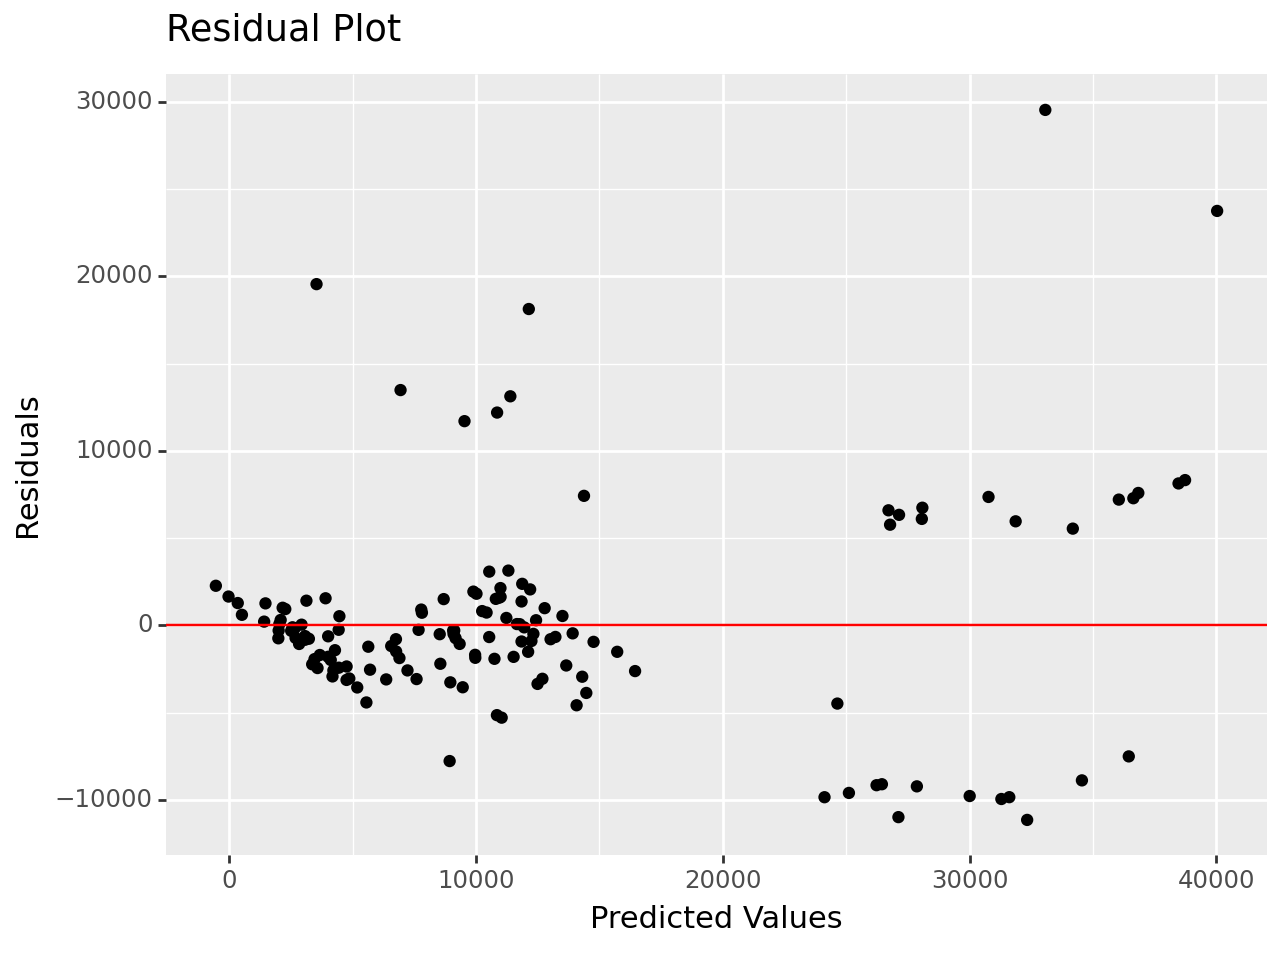

<Figure Size: (640 x 480)>

In [225]:
(ggplot(m13_res_df, aes(x='Predicted', y='Residuals')) +
 geom_point() +
 geom_hline(yintercept=0, color='red') +
 labs(x='Predicted Values', y='Residuals', title='Residual Plot'))